In [1]:
import sys 
sys.path.append('../RenderMan/Builds/LinuxMakefile/build/')
sys.path.append('../dexed/Builds/Linux/build/')


In [2]:
import librenderman as rm

In [26]:
# Important settings. These are good general ones.
sampleRate = 44100
bufferSize = 512
fftSize = 512

# This will host a VST. It will render the features and audio we need.
engine = rm.RenderEngine(sampleRate, bufferSize, fftSize)

# Load the VST into the RenderEngine.
path = "../dexed/Builds/Linux/build/Dexed.so"
path = "../amsynth-1.8.0/.libs/amsynth_vst.so"
engine.load_plugin(path)

# Create a patch generator. We can initialise it to generate the correct
# patches for a given synth by passing it a RenderEngine which has
# loaded a instance of the synthesiser. 
generator = rm.PatchGenerator(engine)

# We can also get a string of information about the
# available parameters.
print engine.get_plugin_parameters_description()


  0: amp_attack
  1: amp_decay
  2: amp_sustain
  3: amp_release
  4: osc1_waveform
  5: filter_attack
  6: filter_decay
  7: filter_sustain
  8: filter_release
  9: filter_resonance
 10: filter_env_amount
 11: filter_cutoff
 12: osc2_detune
 13: osc2_waveform
 14: master_vol
 15: lfo_freq
 16: lfo_waveform
 17: osc2_range
 18: osc_mix
 19: freq_mod_amount
 20: filter_mod_amount
 21: amp_mod_amount
 22: osc_mix_mode
 23: osc1_pulsewidth
 24: osc2_pulsewidth
 25: reverb_roomsize
 26: reverb_damp
 27: reverb_wet
 28: reverb_width
 29: distortion_crunch
 30: osc2_sync
 31: portamento_time
 32: keyboard_mode
 33: osc2_pitch
 34: filter_type
 35: filter_slope
 36: freq_mod_osc
 37: filter_kbd_track
 38: filter_vel_sens
 39: amp_vel_sens
 40: portamento_mode



In [38]:
# Get a random patch and set it.
new_patch = generator.get_random_patch()
engine.set_patch(new_patch)

# We need to override some parameters to prevent hanging notes in
# Dexed. 
overriden_parameters = [(26, 1.),  (30, 0.),  (48, 1.),  (52, 0.), 
                        (70, 1.),  (74, 0.),  (92, 1.),  (96, 0.), 
                        (114, 1.), (118, 0.), (136, 1.), (140, 0.)]

# Loop through each tuple, unpack it and override the correct
# parameter with the correct value to prevent hanging notes.
for parameter in overriden_parameters:
    index, value = parameter
    engine.override_plugin_parameter(index, value)


# Settings to play a note and extract data from the synth.
midiNote = 40
midiVelocity = 127
noteLength = 1.0
renderLength = 1.0

# Render the data. 
engine.render_patch(midiNote, midiVelocity, noteLength, renderLength)

# Get the data. Note the audio is automattically made mono, no
# matter what channel size for ease of use.
audio = engine.get_audio_frames()
mfccs = engine.get_mfcc_frames()

In [40]:
from IPython.display import Audio
Audio(audio, rate=sampleRate)

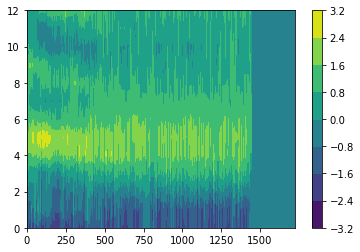

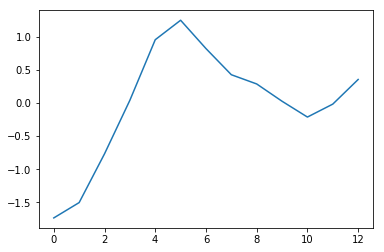

In [24]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.contourf(np.array(mfccs).T)
plt.colorbar()
plt.show()
plt.plot(np.mean(np.array(mfccs).T,axis=1))
plt.show()